# Heatmap
A <mark>**heatmap**</mark> is a graphical representation of data where values are expressed as colors. It is an effective visual summary of information and enables a large volume of data to be communicated efficiently.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./data/grad_admit.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,1,337,118,4,4.5,4.5,3.89,1,Yes
1,2,324,107,4,4.0,4.5,3.58,1,Yes
2,3,316,104,3,3.0,3.5,3.23,1,No
3,4,322,110,3,3.5,2.5,3.50,1,Yes
4,5,314,103,2,2.0,3.0,3.31,0,No


In [3]:
# View correlation between numeric data columns.
df.corr(numeric_only=True)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.047424,-0.063138
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.832669,0.580391
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828019,0.489858
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.745734,0.447783
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718403,0.444029
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.669626,0.396859
GPA,-0.047424,0.832669,0.828019,0.745734,0.718403,0.669626,1.000000,0.521163
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521163,1.000000


## View correlation matrix as a heatmap

Below, we render a heatmap in a family of blue colors. Note that the darker the blue, the higher the correlation between a given variable pair. The lighter the blue, the weaker the correlation between variable pairs.

<Axes: >

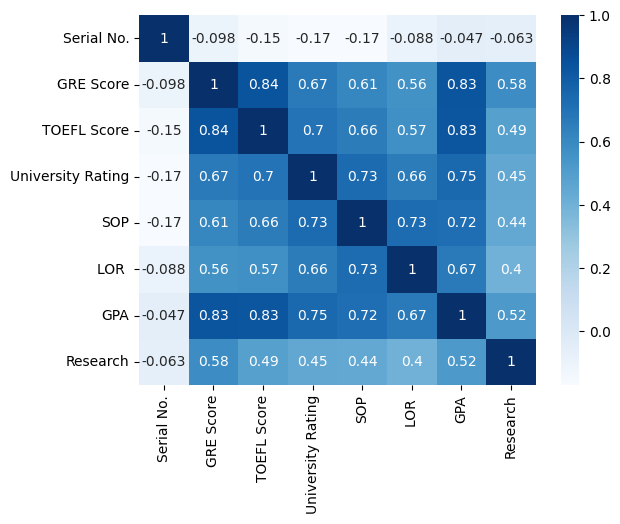

In [4]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)

# Heatmap

A heatmap is a common method of visualizing <mark>gene expression changes</mark> from among hundreds to thousands of genes from different treatment conditions. The heatmap may also be combined with clustering methods which group genes and/or samples together based on the similarity of their gene expression pattern. This can be useful for identifying genes that are commonly regulated, or biological signatures associated with a particular condition (e.g a disease or an environmental condition).

Genes are represented in rows of the matrix and chips/samples in the columns. A colored matrix display represents the matrix of values as a grid; the number of rows is equal to the number of genes being analyzed, and the number of columns is equal to the number of chips/samples.
The boxes of the grid are colored according to the numerical value in the corresponding matrix cell (the gene expression values).

<img src='./images/heatmap.png'>

You will be able to pick genes based on their expression levels under different conditions. Some may not change but those that do change are of the greatest interest. These indicate gene expression associated with a particular condition. Heatmaps also help one to identify significant groupings among the genes through associations.

### Sample gene expression data set
Gene names and treatment conditions.

In [5]:
df = pd.read_csv('./data/gene_expression.csv')
df.head()

,Gene,A,B,C,D,E,F
0,B-CHI,4.505700,3.260360,-1.249400,8.89807,8.05955,-0.842803
1,CTL2,3.508560,1.660790,-1.856680,-2.57336,-1.37370,1.196000
2,B-CHI,2.160030,3.146520,0.982809,9.02430,6.05832,-2.967420
3,CTL2,1.884750,2.295690,0.408891,-3.91404,-2.28049,1.628820
4,CHIV,0.255193,-0.761204,-1.022350,3.65059,2.46525,-1.188140


In [6]:
# set column zero as index
df = df.set_index(df.columns[0])

df.head()

,A,B,C,D,E,F
Gene,,,,,,
B-CHI,4.505700,3.260360,-1.249400,8.89807,8.05955,-0.842803
CTL2,3.508560,1.660790,-1.856680,-2.57336,-1.37370,1.196000
B-CHI,2.160030,3.146520,0.982809,9.02430,6.05832,-2.967420
CTL2,1.884750,2.295690,0.408891,-3.91404,-2.28049,1.628820
CHIV,0.255193,-0.761204,-1.022350,3.65059,2.46525,-1.188140


## Heatmap of gene expression data
Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. Below, we use a colormap from red to green with yellow being the central value. The x-axis represents the treatment conditions and the y-axis represents the gene names.

In heatmaps, the data is displayed in a grid where each row represents a gene and each column represents a sample. The color and intensity of the boxes are used to represent changes (not absolute values) of gene expression. In the following heatmap, <mark>red represents down-regulated genes and green represents up-regulated genes. Yellow represents unchanged expression.</mark>

In [7]:
from bioinfokit import visuz, analys

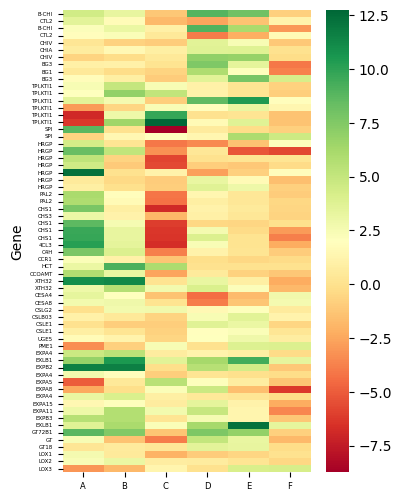

In [8]:
visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, cmap='RdYlGn', tickfont=(6, 4), show=True)

# Volcano Plot

A **<mark>volcano plot</mark>** is a 2-dimensional scatter plot that has the shape of a volcano. It makes it easy to visualize the expression of thousands of genes obtained from -omics research (e.g., transcriptomics, genomics, proteomics, etc.) and to identify genes with significant changes. It is used to plot the log fold change in the observation between two conditions (e.g., the gene expression between comparison and control conditions) on the x-axis. On the y-axis is the corresponding p-value for each observation, representing the statistical significance of the change (if any) between the different conditions.

A volcano plot can visualize a lot of complex information in one plot. The wider the dispersion of data points in the volcano plot the greater the significance in gene expression changes between two conditions.

<img src='./images/log2_plot.png'>

In the volcano plot shown above, the x-axis displays the magnitude of the log<sub>2</sub>-fold change in gene expression between control and treatment conditions. On the y-axis is the level of statistical significance of the observed change. For example, the red points indicate genes that display both large-magnitude fold changes (x-axis) as well as high statistical significance (-log<sub>10</sub> p-value, y-axis). The dashed green line shows the p-vaule cutoff of 0.01 (10<sup>-2</sup>) with points above the line having a p-value < 0.01 and points below the line having a p-value > 0.01. The vertical dashed blue lines indicate log<sub>2</sub>-fold changes of ±2. **Therefore, all red dots exhibit log<sub>2</sub>-fold changes beyond ±2 (four-fold change) and statistical significance less than 0.01.**

<div class="alert alert-block alert-success">
<b>Reading a Volcano Plot</b>
    
To be clear, the <b>x-axis</b> of a Volcano plot represents the amount of change following a condition or experiment. The zero (0) point on the x-axis represents no change. For every point increment to the right of 0, the amount of the change doubles. For example, 1 on the x-axis represents an increase of twice the original (control) value, 2 on the x-axis represents an increase of 4 times the original value, and 3 on the x-axis represents an increase of 8 times the original value. Every point below 0 is interpreted similarly except that it represents a decrease in the original (control) value.
    
The <b>y-axis</b> of a Volcano plot represents the significance of the change on the x-axis in p-values (probability values). The zero (0) point on the y-axis represents a p-value of 1.0. For every point increase on the y-axis, the decimal point of the p-value moves one place to the left. For example, 2 on the y-axis is equivalent to a p-value of .01, which can be interpreted as there's appoxiamtely a 1% chance that you could get the value that you observed, assuming that there is no difference between the control and experimental conditions. In other words, it suggests that the observation appears to be significant. (A 3 on the y-axis would represent a p-value of .001, a 4 would represent a p-value of .0001, etc.)
</div>

## Example

In [9]:
df = pd.read_csv('./data/volcano_data.csv')

df.head()

,GeneNames,log2FC,p-value
0,LOC_Os09g01000.1,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,3.231611,1.050000e-55
2,LOC_Os12g42884.2,3.179004,2.590000e-54
3,LOC_Os03g16920.1,5.290677,4.690000e-54
4,LOC_Os05g47540.4,4.096862,2.190000e-54


### Sample Plot
The sample plot below indicates that the threshold of significance is a log<sub>2</sub>-fold change beyond ±1. So up-regulated genes have a log<sub>2</sub>-fold change threshold of 1, and down-regulated genes have a log<sub>2</sub>-fold change threshold of -1. The p-value threshold for significance is set to 0.05.

The gray points indicate non-significant points. The red points indicate significant up-regulated genes and the black points indicate significant down-regulated genes.

c:\Users\Collins\Desktop\Stanford Data Ocean\.venv\Lib\site-packages\bioinfokit\visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate


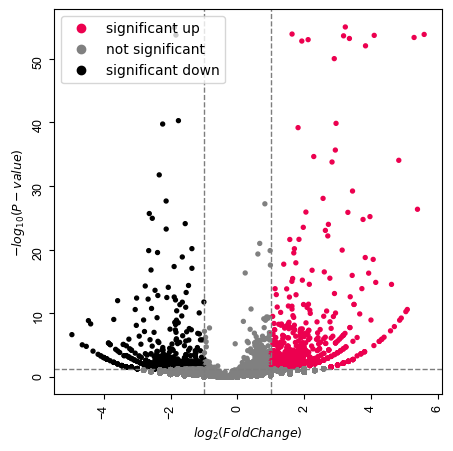

In [17]:
visuz.GeneExpression.volcano(df=df, lfc="log2FC", pv="p-value", show=True, plotlegend=True,
                                    sign_line=True, color=("#EC004F", "grey", "black"))

### Modify the thresholds
The sample plot below is displayed with a log<sub>2</sub>-fold threshold of -1 and a p-value threshold of < 0.05 for significantly down-regulted genes. And a log<sub>2</sub>-fold threshold of 2 and a p-value threshold of < 0.01 for significantly up-regulted genes.

The light gray points indicate non-significant points. The pink points indicate significant down-regulated genes (i.e., log<sub>2</sub>-fold < -1 and p-value < 0.05)  and the cardinal points indicate significant up-regulated genes (log<sub>2</sub>-fold > 2 and p-value < 0.01).

c:\Users\Collins\Desktop\Stanford Data Ocean\.venv\Lib\site-packages\bioinfokit\visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate


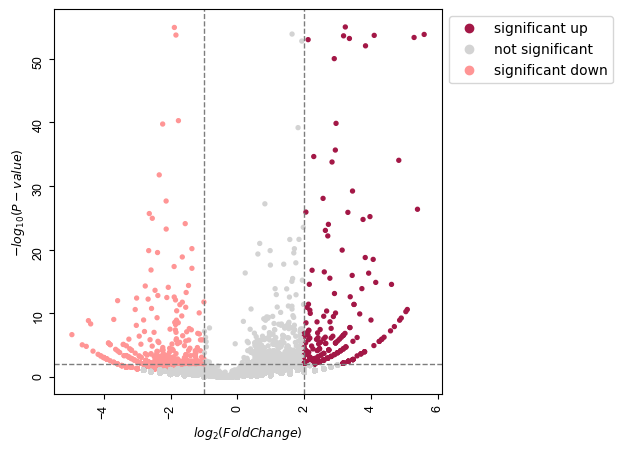

In [18]:
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 1), pv_thr=(0.01, 0.05),
    color=("#A31746", "lightgrey", "#FF9595"), show=True, plotlegend=True, legendpos='upper right',
    sign_line=True, legendanchor=(1.46,1))

## The plots can be customized

c:\Users\Collins\Desktop\Stanford Data Ocean\.venv\Lib\site-packages\bioinfokit\visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate


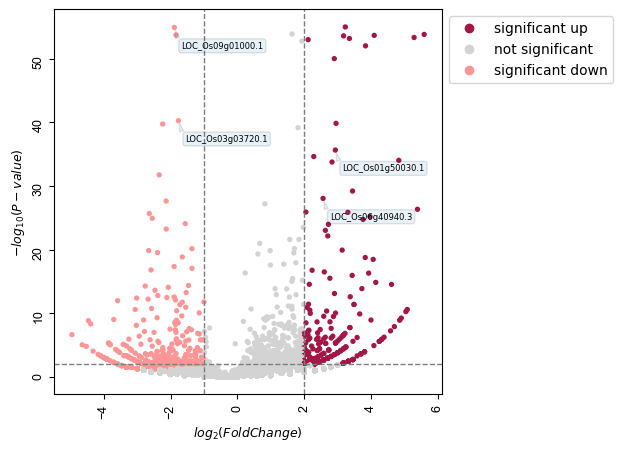

In [19]:
# add gene labels
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 1), pv_thr=(0.01, 0.05),
    color=("#A31746", "lightgrey", "#FF9595"), show=True, plotlegend=True, legendpos='upper right',
    sign_line=True, legendanchor=(1.46,1), genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1"),
    gstyle=2, geneid="GeneNames")